In [164]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# for color pallette
color_pal = sns.color_palette()

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    mean_squared_error,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
df.drop

<bound method DataFrame.drop of                                 Datetime   PJME_MW  hour  dayofweek  quarter  \
Datetime                                                                       
2002-12-31 01:00:00  2002-12-31 01:00:00 26498.000     1          1        4   
2002-12-31 02:00:00  2002-12-31 02:00:00 25147.000     2          1        4   
2002-12-31 03:00:00  2002-12-31 03:00:00 24574.000     3          1        4   
2002-12-31 04:00:00  2002-12-31 04:00:00 24393.000     4          1        4   
2002-12-31 05:00:00  2002-12-31 05:00:00 24860.000     5          1        4   
...                                  ...       ...   ...        ...      ...   
2018-01-01 20:00:00  2018-01-01 20:00:00 44284.000    20          0        1   
2018-01-01 21:00:00  2018-01-01 21:00:00 43751.000    21          0        1   
2018-01-01 22:00:00  2018-01-01 22:00:00 42402.000    22          0        1   
2018-01-01 23:00:00  2018-01-01 23:00:00 40164.000    23          0        1   
2018-01-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
# read data
df = pd.read_csv("PJME_hourly.csv")
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.000
1,2002-12-31 02:00:00,25147.000
2,2002-12-31 03:00:00,24574.000
3,2002-12-31 04:00:00,24393.000
4,2002-12-31 05:00:00,24860.000
...,...,...
145361,2018-01-01 20:00:00,44284.000
145362,2018-01-01 21:00:00,43751.000
145363,2018-01-01 22:00:00,42402.000
145364,2018-01-01 23:00:00,40164.000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [205]:
# check datatype
df.dtypes

Datetime     object
PJME_MW     float64
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [206]:
# set index to be DateTime column
df.set_index("Datetime")

# caste datetime column to date time from object
df.index = pd.to_datetime(df["Datetime"])
df.index


DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

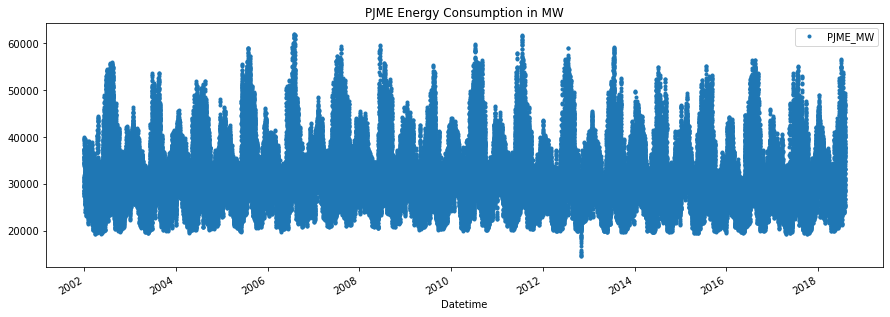

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [207]:
# to visualize the data
df.plot(
    style=".",
    figsize=(15, 5),
    color=color_pal[0],
    title="PJME Energy Consumption in MW",
)
plt.show()

In [208]:
# locate all the data prior to 2015 as train data
train = df.loc[df.index < "01-01-2015"]

# locate all the data after 2015 as test data
test = df.loc[df.index >= "01-01-2015"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

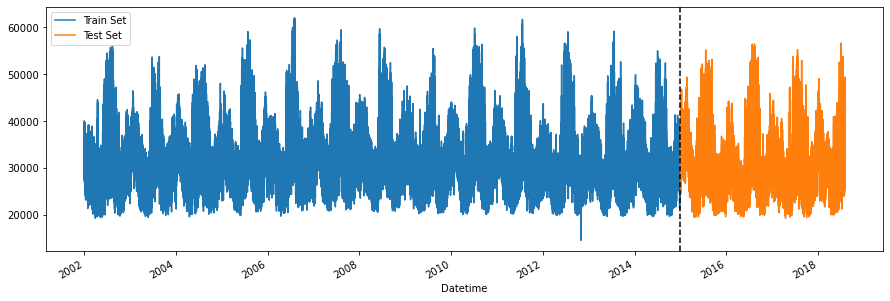

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [209]:
# to plot the train and test data
fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax, label="Training set")
test.plot(ax=ax, label="Testing set")
ax.axvline("01-01-2015", color="black", ls="--")
ax.legend(["Train Set", "Test Set"])
plt.show()

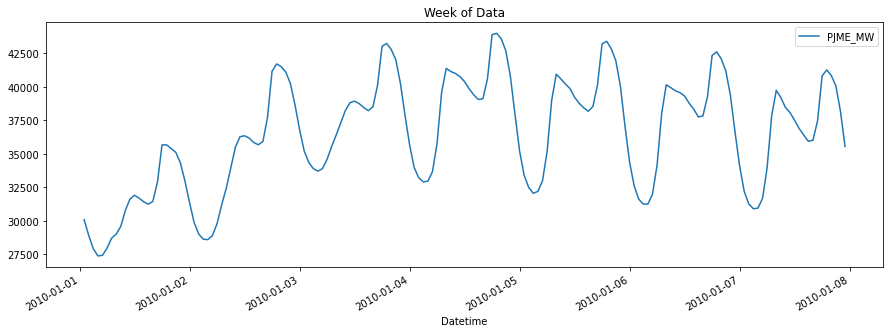

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [210]:
# to get an idea of what one single week looks like
df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")].plot(
    figsize=(15, 5), title="Week of Data"
)
plt.show()

In [211]:
# Feature Creation using time series index


def create_features(df):
    "Create features based on time series index"
    df = df.copy()
    df["hour"] = df.index.hour
    df["dayofweek"] = df.index.dayofweek
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["dayofyear"] = df.index.dayofyear
    return df


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
df = create_features(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

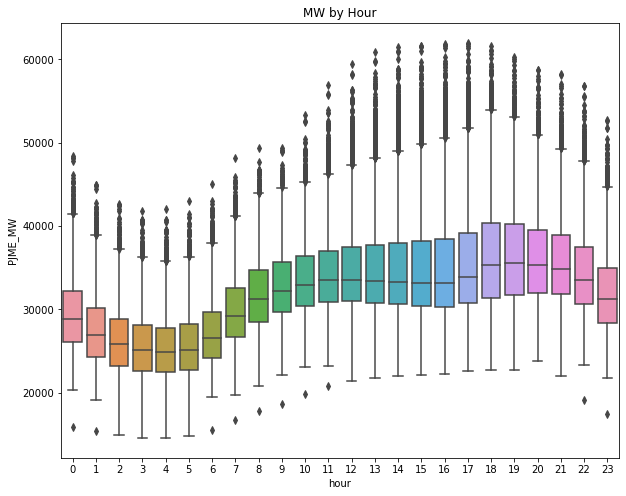

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [213]:
# Visualise feature/target relationship for hourly use
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="hour", y="PJME_MW")
ax.set_title("MW by Hour")
plt.show()

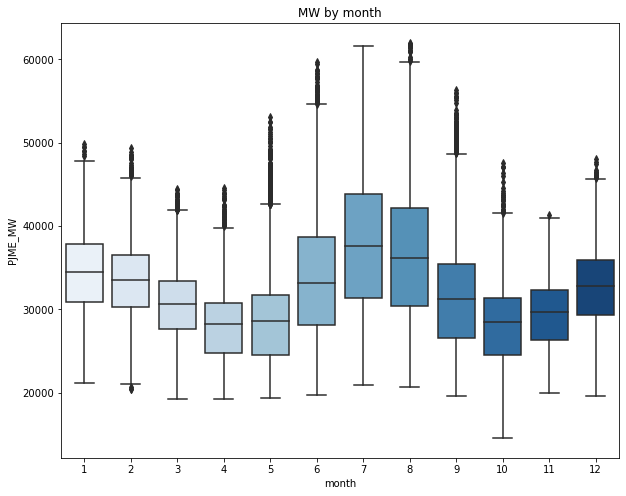

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [214]:
# Visualise feature/target relationship for monthly use
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="month", y="PJME_MW", palette="Blues")
ax.set_title("MW by month")
plt.show()

In [215]:
# run the create features function on the train and test data
train = create_features(train)
test = create_features(test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [216]:
df.columns

Index(['Datetime', 'PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [223]:
# Create features and target variables, X and y respectively
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
TARGET = ["PJME_MW"]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [224]:
df

,Datetime,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,,
2002-12-31 01:00:00,2002-12-31 01:00:00,26498.000,1,1,4,12,2002,365
2002-12-31 02:00:00,2002-12-31 02:00:00,25147.000,2,1,4,12,2002,365
2002-12-31 03:00:00,2002-12-31 03:00:00,24574.000,3,1,4,12,2002,365
2002-12-31 04:00:00,2002-12-31 04:00:00,24393.000,4,1,4,12,2002,365
2002-12-31 05:00:00,2002-12-31 05:00:00,24860.000,5,1,4,12,2002,365
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,2018-01-01 20:00:00,44284.000,20,0,1,1,2018,1
2018-01-01 21:00:00,2018-01-01 21:00:00,43751.000,21,0,1,1,2018,1
2018-01-01 22:00:00,2018-01-01 22:00:00,42402.000,22,0,1,1,2018,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [225]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [226]:
# Create our model
reg = XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[100]	validation_0-rmse:12342.13873	validation_1-rmse:11517.66004
[200]	validation_0-rmse:5373.33346	validation_1-rmse:5165.30811
[300]	validation_0-rmse:3375.20923	validation_1-rmse:3829.25476
[400]	validation_0-rmse:2882.55200	validation_1-rmse:3715.04915
[437]	validation_0-rmse:2793.31200	validation_1-rmse:3727.16078


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [227]:
# Feature importance to give the important values based on how much these features
# were used in each of the trees built by the xgb model
fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["importance"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

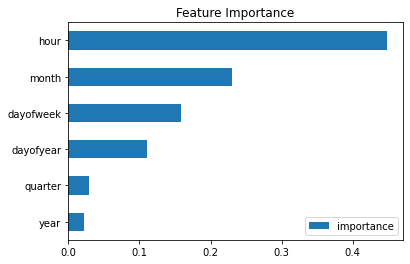

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [228]:
fi.sort_values("importance").plot(kind="barh", title="Feature Importance")
plt.show()

In [231]:
# Forecast on the test set with the trained model
test["prediction"] = reg.predict(X_test)
df = df.merge(test[["prediction"]], how="left", left_index=True, right_index=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [232]:
df

,Datetime,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,,
2002-01-01 01:00:00,2002-01-01 01:00:00,30393.000,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,2002-01-01 02:00:00,29265.000,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,2002-01-01 03:00:00,28357.000,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,2002-01-01 04:00:00,27899.000,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,2002-01-01 05:00:00,28057.000,5,1,1,1,2002,1,NaN
...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,2018-08-02 20:00:00,44057.000,20,3,3,8,2018,214,41014.219
2018-08-02 21:00:00,2018-08-02 21:00:00,43256.000,21,3,3,8,2018,214,40507.141
2018-08-02 22:00:00,2018-08-02 22:00:00,41552.000,22,3,3,8,2018,214,38933.621


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

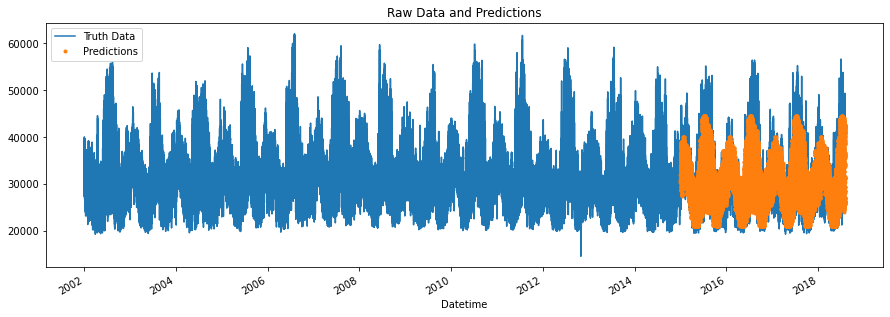

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [234]:
# Visualization
ax = df[["PJME_MW"]].plot(figsize=(15, 5))
df["prediction"].plot(ax=ax, style=".")
plt.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Data and Predictions")
plt.show()

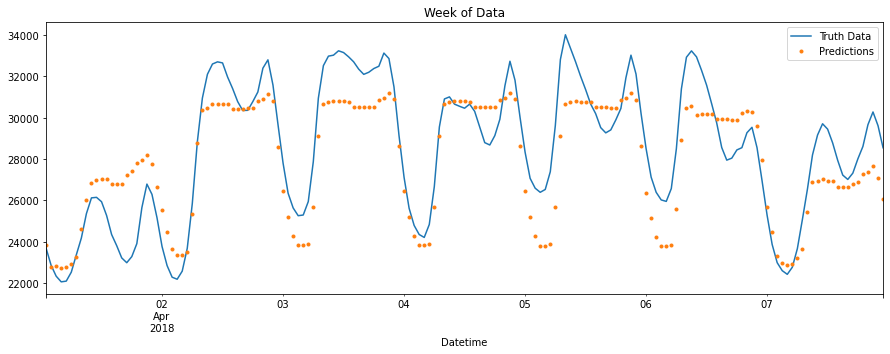

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [239]:
# to check one week of data
# to get an idea of what one single week looks like
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["PJME_MW"].plot(
    figsize=(15, 5), title="Week of Data"
)
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["prediction"].plot(
    style="."
)
plt.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Data and Predictions")
plt.show()

In [243]:
# to test model performance
np.sqrt(mean_squared_error(test["PJME_MW"], test["prediction"]))
# print(f"RMSE Score on Test set : {score:0.2f}")

3714.530191611067

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [262]:
# Calculate error
# worst predictions

test["error"] = np.abs(test["PJME_MW"] - test["prediction"])
test["date"] = test.index.date
test.groupby(["date"])["error"].mean().sort_values(ascending=False).head(5)

date
2016-08-13   14559.814
2016-08-14   14393.351
2016-09-10   12564.790
2016-08-12   11527.895
2016-09-09   11432.962
Name: error, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [264]:
# Calculate error
# best predictions
test["error"] = np.abs(test["PJME_MW"] - test["prediction"])
test["date"] = test.index.date
test.groupby(["date"])["error"].mean().sort_values(ascending=True).head(5)

date
2016-09-27   376.075
2016-05-01   420.460
2016-04-04   432.775
2015-03-10   444.995
2016-12-08   480.122
Name: error, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## next steps
# more robust cross validation
# add more features (weather forecast, holidays)